# Montecarlo (Ottimizzazione Portafoglio)
[1 Portfolio Optimization Using Monte Carlo Simulation](https://blog.quantinsti.com/portfolio-optimization-maximum-return-risk-ratio-python/)

In [11]:
#Import relevant libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [12]:
#Fetch data from yahoo and save under DataFrame named 'data'
stock = ['BAC', 'GS', 'JPM', 'MS']
data = web.DataReader(stock,data_source="yahoo",start='12/01/2017',end='12/31/2017')['Adj Close']

In [13]:
#Arrange the data in ascending order
data=data.iloc[::-1]
print (data.round(2))

Symbols       BAC      GS    JPM     MS
Date                                   
2017-12-29  26.95  234.90  94.86  43.85
2017-12-28  27.20  236.50  95.62  44.00
2017-12-27  27.14  236.00  95.11  43.94
2017-12-26  27.19  237.63  94.93  43.85
2017-12-22  27.28  238.78  95.31  44.06
2017-12-21  27.22  240.66  95.65  44.20
2017-12-20  26.91  235.29  94.15  43.89
2017-12-19  26.89  236.49  94.48  44.24
2017-12-18  26.91  239.75  94.88  44.50
2017-12-15  26.51  237.12  94.15  44.38
2017-12-14  26.23  235.56  92.84  44.00
2017-12-13  26.33  235.64  93.59  44.45
2017-12-12  26.77  237.59  94.78  45.01
2017-12-11  26.42  230.63  93.69  44.10
2017-12-08  26.52  230.83  93.97  44.20
2017-12-07  26.27  229.18  92.80  43.75
2017-12-06  26.15  226.78  93.08  43.20
2017-12-05  26.41  228.97  93.78  43.47
2017-12-04  26.53  231.11  94.87  44.03
2017-12-01  25.65  229.54  92.95  43.42


In [14]:
#Compute stock returns and print the returns in percentage format
stock_ret = data.pct_change()
print (stock_ret.round(4)*100)

Symbols      BAC    GS   JPM    MS
Date                              
2017-12-29   NaN   NaN   NaN   NaN
2017-12-28  0.95  0.68  0.79  0.34
2017-12-27 -0.23 -0.21 -0.53 -0.15
2017-12-26  0.17  0.69 -0.19 -0.19
2017-12-22  0.34  0.49  0.40  0.48
2017-12-21 -0.20  0.79  0.35  0.30
2017-12-20 -1.14 -2.23 -1.57 -0.70
2017-12-19 -0.10  0.51  0.35  0.80
2017-12-18  0.10  1.38  0.42  0.59
2017-12-15 -1.49 -1.10 -0.77 -0.26
2017-12-14 -1.07 -0.66 -1.39 -0.87
2017-12-13  0.38  0.03  0.81  1.03
2017-12-12  1.66  0.83  1.27  1.26
2017-12-11 -1.30 -2.93 -1.15 -2.01
2017-12-08  0.38  0.09  0.29  0.23
2017-12-07 -0.93 -0.72 -1.24 -1.02
2017-12-06 -0.49 -1.05  0.30 -1.26
2017-12-05  1.01  0.97  0.75  0.62
2017-12-04  0.45  0.93  1.16  1.29
2017-12-01 -3.30 -0.68 -2.02 -1.39


In [15]:
#Calculate mean returns and covariances of all four the stocks
mean_returns = stock_ret.mean()
cov_matrix = stock_ret.cov()
print (mean_returns)
print (cov_matrix)

Symbols
BAC   -0.002531
GS    -0.001151
JPM   -0.001022
MS    -0.000482
dtype: float64
Symbols       BAC        GS       JPM        MS
Symbols                                        
BAC      0.000125  0.000085  0.000099  0.000082
GS       0.000085  0.000131  0.000084  0.000088
JPM      0.000099  0.000084  0.000098  0.000078
MS       0.000082  0.000088  0.000078  0.000089


In [16]:
#Set the number of iterations to 10000 and define an array to hold the simulation results; initially set to all zeros
num_iterations = 10000
simulation_res = np.zeros((4+len(stock)-1,num_iterations))

In [17]:
for i in range(num_iterations):
    #Select random weights and normalize to set the sum to 1
    weights = np.array(np.random.random(4))
    weights /= np.sum(weights)
#Calculate the return and standard deviation for every step
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
#Store all the results in a defined array
    simulation_res[0,i] = portfolio_return
    simulation_res[1,i] = portfolio_std_dev
#Calculate Sharpe ratio and store it in the array
    simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
#Save the weights in the array
    for j in range(len(weights)):
            simulation_res[j+3,i] = weights[j]


In [18]:
sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3]])
print (sim_frame.head())
print (sim_frame.tail())

        ret     stdev    sharpe       BAC        GS       JPM        MS
0 -0.000829  0.009325 -0.088911  0.011470  0.146876  0.417697  0.423957
1 -0.001064  0.009614 -0.110626  0.042164  0.275986  0.575426  0.106423
2 -0.001790  0.010104 -0.177120  0.533801  0.067310  0.312561  0.086327
3 -0.001149  0.009550 -0.120351  0.156684  0.276424  0.299060  0.267833
4 -0.001381  0.010044 -0.137501  0.233283  0.527830  0.125939  0.112947
           ret     stdev    sharpe       BAC        GS       JPM        MS
9995 -0.001055  0.009625 -0.109629  0.062064  0.354225  0.387375  0.196335
9996 -0.001187  0.010156 -0.116869  0.140266  0.598492  0.031750  0.229492
9997 -0.001240  0.009515 -0.130289  0.240694  0.132035  0.326315  0.300956
9998 -0.001131  0.009759 -0.115844  0.137061  0.429429  0.149111  0.284399
9999 -0.001380  0.009626 -0.143315  0.379577  0.175344  0.004766  0.440313


In [19]:
#Spot the position of the portfolio with highest Sharpe Ratio
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]

In [20]:
#Spot the position of the portfolio with minimum Standard Deviation
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print ("The portfolio for max Sharpe Ratio:\n", max_sharpe)
print ("The portfolio for min risk:\n", min_std)

The portfolio for max Sharpe Ratio:
 ret      -0.000584
stdev     0.009440
sharpe   -0.061866
BAC       0.018740
GS        0.092929
JPM       0.003181
MS        0.885150
Name: 5218, dtype: float64
The portfolio for min risk:
 ret      -0.000698
stdev     0.009240
sharpe   -0.075516
BAC       0.008597
GS        0.013528
JPM       0.350691
MS        0.627184
Name: 2770, dtype: float64


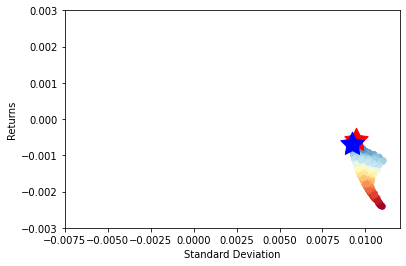

In [21]:
#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.ylim(-0.003,.003)
plt.xlim(-0.0075,0.012)
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)
#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=600)
plt.show()